# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

# Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.
Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

# Инструкция по выполнению проекта

1. **Откройте файл** с данными и **изучите его**. Путь к файлу: /datasets/users_behavior.csv.
2. **Разделите** исходные **данные** на **обучающую**, **валидационную** и **тестовую выборки**.
3. **Исследуйте** качество разных моделей, меняя гиперпараметры. Кратко **напишите выводы** исследования.
4. **Проверьте качество модели** на тестовой выборке.
5. Дополнительное задание: **проверьте модели** на "вменяемость". Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.

## Откройте и изучите файл

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd  # Для работы с данными в формате DataFrame
import seaborn as sns  # Для визуализации данных
import numpy as np  # Для работы с массивами и вычислений
import matplotlib.pyplot as plt  # Для построения графиков
import matplotlib.patches as mpatches  # Для создания легенды на графиках
import warnings  # Для управления предупреждениями

# Импортируем модули
from tqdm import tqdm  # Для создания индикатора выполнения в циклах
from pylab import rcParams  # Для настройки параметров отображения графиков
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающий и тестовый наборы
from sklearn.tree import DecisionTreeClassifier  # Для использования модели дерева решений
from sklearn.ensemble import RandomForestClassifier  # Для использования модели случайного леса
from sklearn.linear_model import LogisticRegression  # Для использования модели логистической регрессии
from sklearn.dummy import DummyClassifier  # Для создания базовой модели
from sklearn.metrics import accuracy_score  # Для оценки точности моделей
from sklearn.metrics import precision_score  # Для оценки precision моделей
from sklearn.metrics import recall_score  # Для оценки recall моделей
from sklearn.metrics import f1_score  # Для оценки F1-меры моделей

In [4]:
# Выводим информацию о версиях установленных библиотек
!pip show pandas seaborn numpy matplotlib scikit-learn

Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: python-dateutil, pytz, numpy
Required-by: statsmodels, seaborn, catboost
---
Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /opt/conda/lib/python3.9/site-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: 
---
Name: numpy
Version: 1.21.1
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /opt/conda/lib/python3.9/site-packages
Requires: 
Required-by: xgboost, transformers, thinc, tensorflow-cpu, tensorboard, statsmodels, spacy, seaborn, scipy,

In [5]:
#Настройка отображения рамера графиков
rcParams['figure.figsize'] = 17, 7
# скрываем предупреждения
warnings.filterwarnings('ignore')

Определим переменную для указания в качестве random_state на уровне проекта

In [6]:
# Это целое число, которое не связано с каким-либо конкретным случаем, 
# но в то же время будет фиксировать разбиение на тренировочную и валидационную 
# выборки и порождать одинаковые результаты при повторном запуске кода.
random_state = 123456

In [7]:
# Попытаемся прочитать CSV-файл из локального пути '/datasets/users_behavior.csv'
try:
    data_behavior = pd.read_csv('/datasets/users_behavior.csv', sep=',')
    
# Если не удалось прочитать файл локально, то выполняем код в блоке except
except:
    # Пробуем прочитать CSV-файл из удаленного источника по URL 'https://code.s3.yandex.net/datasets/users_behavior.csv'
    data_behavior = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv', sep=',')

# В данном случае, если файл успешно загружен, данные будут храниться в переменной 'calls'
# Если первая попытка чтения из локального пути завершится успешно, блок 'except' не будет выполнен.

In [8]:
#Выводим первые 5 строк датафрейма на экран
data_behavior.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [9]:
#Выводим последние 5 строк датафрейма на экран
data_behavior.tail(5)

,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1


**Описание данных**

**Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:**

1. сalls — количество звонков,
2. minutes — суммарная длительность звонков в минутах,
3. messages — количество sms-сообщений,
4. mb_used — израсходованный интернет-трафик в Мб,
5. is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [10]:
#Определяем количество строк в датафрейме
data_behavior.shape[0]

3214

In [11]:
#Определяем количество столбцов в датафрейме
data_behavior.shape[1]

5

In [12]:
#Получаю общую информацию о датафрейме
data_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


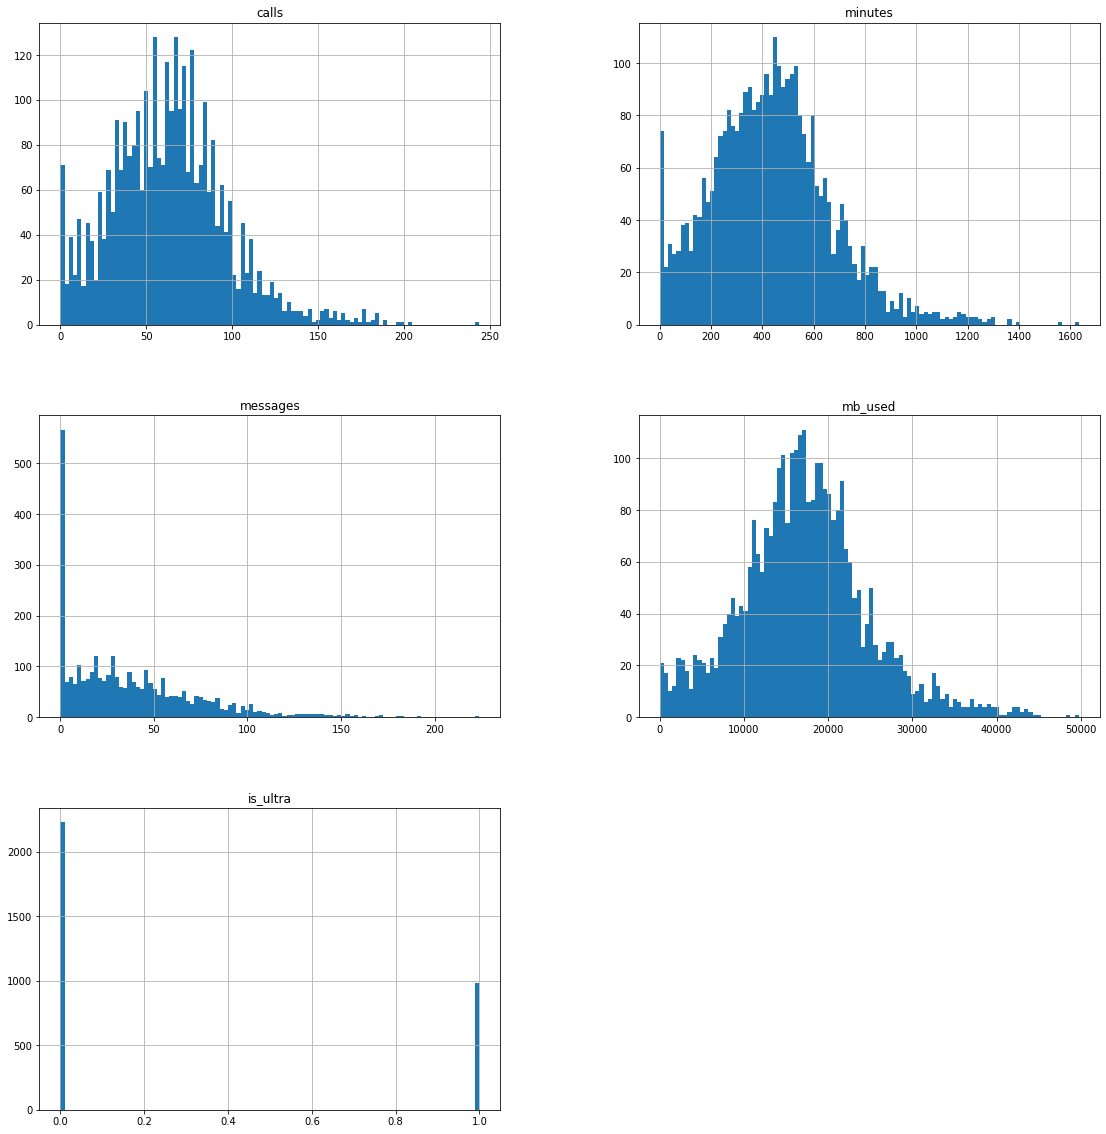

In [13]:
#Построение общей гистограммы для всех числовых столбцов таблицы
data_behavior.hist(bins=100, figsize=(19, 20));

In [14]:
#Посмотрим в каких столбцах есть пропуски
data_behavior.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [15]:
#получаю основные статистические характеристики
data_behavior.describe().round(1)

,calls,minutes,messages,mb_used,is_ultra
count,3214.0,3214.0,3214.0,3214.0,3214.0
mean,63.0,438.2,38.3,17207.7,0.3
std,33.2,234.6,36.1,7571.0,0.5
min,0.0,0.0,0.0,0.0,0.0
25%,40.0,274.6,9.0,12491.9,0.0
50%,62.0,430.6,30.0,16943.2,0.0
75%,82.0,571.9,57.0,21424.7,1.0
max,244.0,1632.1,224.0,49745.7,1.0


In [16]:
# вычислить корреляцию между числовыми столбцами в датафрейме
data_behavior.corr()

,calls,minutes,messages,mb_used,is_ultra
calls,1.000000,0.982083,0.177385,0.286442,0.207122
minutes,0.982083,1.000000,0.173110,0.280967,0.206955
messages,0.177385,0.173110,1.000000,0.195721,0.203830
mb_used,0.286442,0.280967,0.195721,1.000000,0.198568
is_ultra,0.207122,0.206955,0.203830,0.198568,1.000000


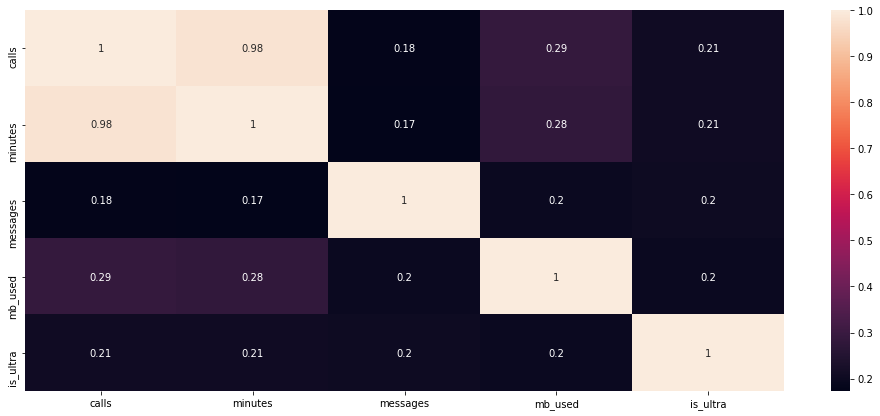

In [17]:
# построим корреляцтионную карту
sns.heatmap(data_behavior.corr(), annot=True);

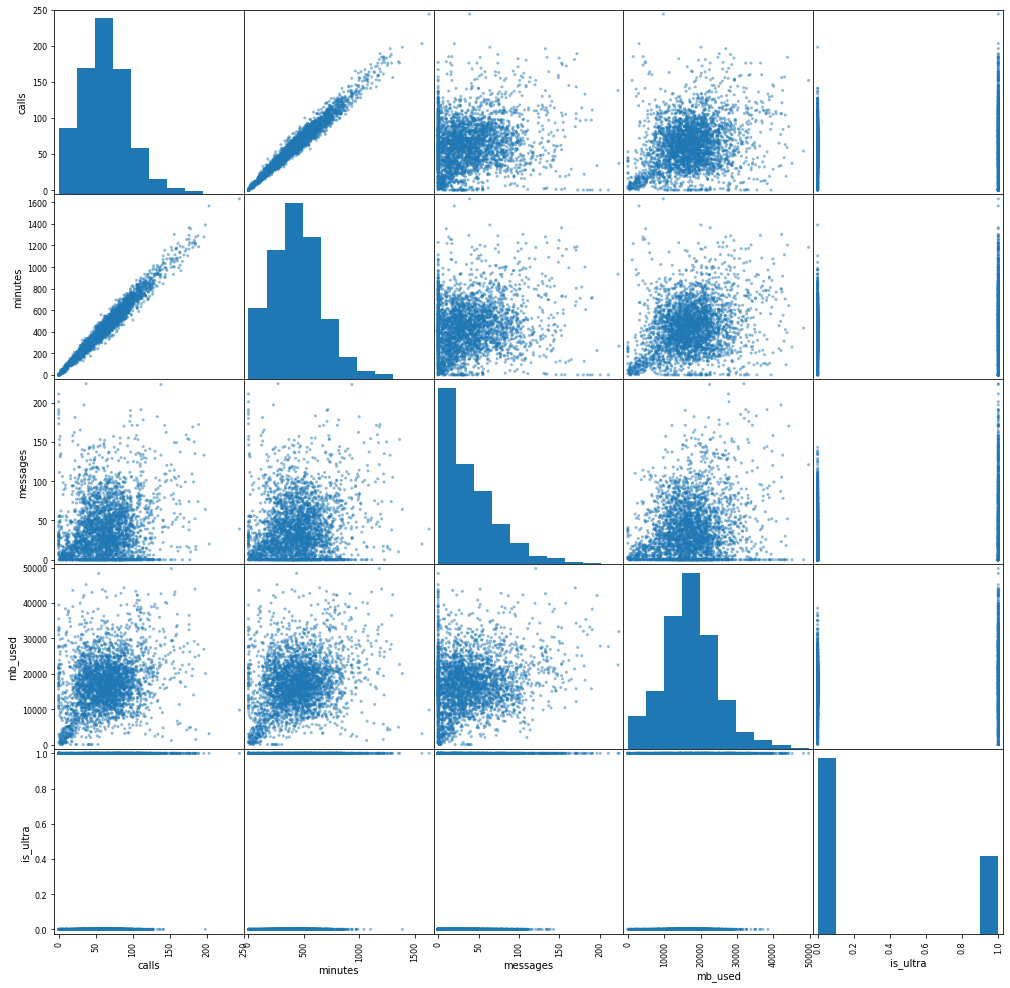

In [19]:
# Загружаем данные из DataFrame data_behavior и выбираем столбцы 'calls', 'minutes', 'messages', 'mb_used', 'is_ultra'
# для построения матрицы рассеяния (scatter matrix)
data_subset = data_behavior[['calls', 'minutes', 'messages', 'mb_used', 'is_ultra']]

# Устанавливаем размер графика
fig, axes = plt.subplots(figsize=(17, 17))

# Строим матрицу рассеяния
pd.plotting.scatter_matrix(data_subset, ax=axes)

# Отображаем график
plt.show()

In [20]:
# Подсчитываем количество уникальных значений в столбце 'is_ultra' и выводим результат
# Это позволяет узнать, сколько клиентов используют тариф "Ультра" (значение 1) и сколько "Смарт" (значение 0)
data_behavior['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [21]:
# Подсчитываем количество дубликатов в DataFrame и выводим результат
# Функция duplicated() возвращает булеву серию, где True обозначает дубликаты, а затем суммируем их количество
print('Количество дублей равно:', data_behavior.duplicated().sum())

Количество дублей равно: 0


Описание тарифов

**<span style="color:magenta">Тариф «Ультра»</span>:**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
  - минута разговора: 1 рубль
  - сообщение: 1 рубль
  - 1 Гб интернет-трафика: 150 рублей

**<span style="color:green">Тариф «Смарт»</span>:**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
  - Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
  - сообщение: 3 рубля
  - 1 Гб интернет-трафика: 200 рублей


**Правила тарификации: **
- округление вверх значения длительности звонка (до минут)
- округление вверх значения объема трафика интернет-сессии (до мегабайт)
- округление вверх значения общего объема трафика (до гигабайт)

# Вывод

Таблица содержит 3214 записей о пользователях «Мегалайн». В таблице присутствуют атрибуты разных типов: 4 вещественных и 1 целочисленный атрибут. Значениями столбца `is_ultra` соответствуют 1 (тариф «Ультра») и 0 («Смарт»).

Пропуски в данных отсутствуют. Для задачи, связанной с построением модели, целевым признаком является `is_ultra`, который является признаком для бинарной классификации.

Для улучшения обработки данных в задаче анализа использования тарифных планов мобильной связи, лучше будет изменить тип данных атрибутов `calls` и `messages` с вещественных на целочисленные, так как количество звонков и сообщений не может быть дробным. Также, для атрибутов `minutes` и `mb_used`, можно выполнить округление до целочисленных значений, так как данные приведены за месяц пользования услугами.

При этом необходимо учесть, что минимальными значениями атрибутов является 0, поэтому необходимо проверить отсутствие записей с нулевыми значениями во всех атрибутах, чтобы исключить неактивных пользователей из анализа.

Для выбора параметров моделей определим значения некоторых дополнительных атрибутов:

- `avg_call_duration` - средняя продолжительность звонка. Этот атрибут может быть полезен, чтобы узнать, склонен ли пользователь к долгим звонкам или предпочитает короткие разговоры.
- `gb_used` - объем трафика в Гб. Этот атрибут может быть полезен, чтобы понять, сколько интернет-трафика пользователь обычно использует, и насколько ему нужен тариф с большим объемом интернет-трафика.

**Приведение типов данных**

In [59]:
# Изменяем тип данных в столбцах 'calls', 'minutes', 'messages', и 'mb_used' на целочисленный
data_behavior = data_behavior.astype({
    'calls': 'int', 
    'minutes': 'int', 
    'messages': 'int', 
    'mb_used': 'int'
})

# Проверяем измененные типы данных для убеждения
print(data_behavior.dtypes)

calls       int64
minutes     int64
messages    int64
mb_used     int64
is_ultra    int64
dtype: object

In [23]:
# Проверяем, есть ли записи с нулевыми значениями для всех атрибутов
count_zero_records = data_behavior.query('(calls + minutes + messages + mb_used) == 0')['is_ultra'].count()

# Выводим количество записей с нулевыми значениями
print('Количество записей с нулевыми значениями во всех атрибутах:', count_zero_records)

Количество записей с нулевыми значениями во всех атрибутах: 0


Преобразование типов данных выполнено.

**Формирование дополнительных атрибутов**

In [25]:
# Рассчитываем среднюю продолжительность звонков (avg_call_duration) как отношение минут к количеству звонков
# Здесь также округляем значения до двух знаков после запятой и заполняем возможные NaN значения нулями
data_behavior['avg_call_duration'] = data_behavior.eval('minutes / calls').round(2).fillna(0)

# Рассчитываем объем использованного интернет-трафика в гигабайтах (gb_used) путем деления мегабайт на 1024 и округления вверх
data_behavior['gb_used'] = np.ceil(data_behavior['mb_used'] / 1024).astype('int')

# Выводим первые 5 строк обновленного датафрейма для проверки
data_behavior.head(5)

,calls,minutes,messages,mb_used,is_ultra,avg_call_duration,gb_used
0,40.0,311.90,83.0,19915.42,0,7.80,20
1,85.0,516.75,56.0,22696.96,0,6.08,23
2,77.0,467.66,86.0,21060.45,0,6.07,21
3,106.0,745.53,81.0,8437.39,1,7.03,9
4,66.0,418.74,1.0,14502.75,0,6.34,15


## Разбейте данные на выборки

Когда мы строим модель машинного обучения, мы хотим убедиться, что она будет работать хорошо на новых данных. Для этого мы должны проверить модель на данных, которые она ранее не видела.

Чтобы разбить данные на три части - обучающую, валидационную и тестовую выборки, мы будем использовать принцип стратифицированной рандомизации. Это означает, что мы сохраняем соотношение между классами в каждой из трех выборок, чтобы убедиться, что каждая выборка содержит одинаковую долю пользователей с тарифом **«Смарт»** и **«Ультра»**.

Мы будем использовать соотношение 3:1:1 для разбиения данных. Сначала мы выделим тестовую выборку (`test`), затем валидационную (`valid`), а оставшиеся данные будут использованы для обучения модели (`train`). Это означает, что наша модель будет обучаться на 60% данных, валидироваться на 20% данных и тестироваться на оставшихся 20% данных.

Таким образом, мы сможем проверить точность нашей модели на новых данных и убедиться, что она работает хорошо на данных, которые она ранее не видела.

In [26]:
def split_data(df):
    # Разбиваем исходный датафрейм на обучающее и тестовое подмножества в соотношении 80% к 20%
    df_train, df_test = train_test_split(df, test_size=0.20, random_state=random_state, stratify=df['is_ultra'])
    
    # Далее разбиваем обучающее подмножество на обучающее и валидационное подмножества в соотношении 75% к 25%
    df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=random_state, stratify=df_train['is_ultra'])
    
    # Возвращаем полученные датафреймы: обучающее, валидационное и тестовое
    return df_train, df_valid, df_test

In [27]:
# Разбиваем исходные данные на обучающее, валидационное и тестовое подмножества
data_train, data_valid, data_test = split_data(data_behavior)

In [28]:
# Выводим долю пользователей с тарифом "Ультра" в каждом подмножестве
print(data_train['is_ultra'].mean(), data_valid['is_ultra'].mean(), data_test['is_ultra'].mean())

0.3065352697095436 0.30637636080870917 0.30637636080870917


In [29]:
print('Размер тренериующей выборки', data_train.shape[0])
print('Размер валидационной выборки', data_valid.shape[0])
print('Размер тестовой выборки', data_test.shape[0])

Размер тренериующей выборки 1928
Размер валидационной выборки 643
Размер тестовой выборки 643


Для изучения распределения атрибутов среди пользователей разных тарифов мы построим графики, используя данные из обучающей и валидационной выборок. 

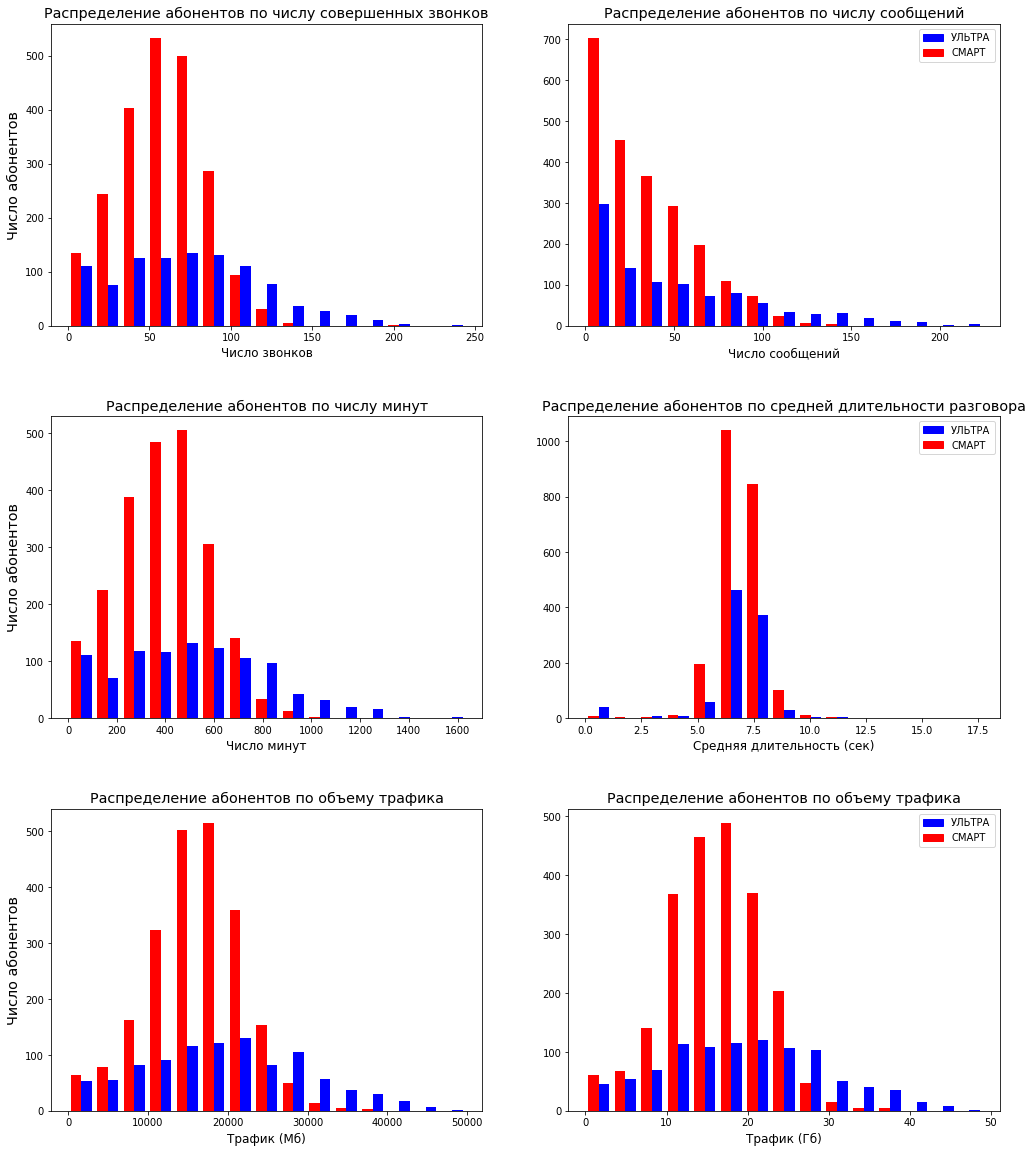

In [30]:
# Создаем словарь source_features, где ключи - это исходные атрибуты данных,
# а значения - это кортежи, содержащие название и подпись для графика.
source_features = {
    'calls': ('Распределение абонентов по числу совершенных звонков', 'Число звонков'), 
    'messages': ('Распределение абонентов по числу сообщений', 'Число сообщений'),
    'minutes': ('Распределение абонентов по числу минут', 'Число минут'),
    'avg_call_duration': ('Распределение абонентов по средней длительности разговора', 'Средняя длительность (сек)'),
    'mb_used': ('Распределение абонентов по объему трафика', 'Трафик (Мб)'),
    'gb_used': ('Распределение абонентов по объему трафика', 'Трафик (Гб)'),
}

# Создаем фигуру с 3x2 графиками для каждого из атрибутов
fig, axs = plt.subplots(
    nrows=3, 
    ncols=2, 
    figsize=(17,20) 
)
plt.subplots_adjust(hspace=0.3)

# Определяем цвета для легенды
blue_patch = mpatches.Patch(color='blue', label='УЛЬТРА')
red_patch = mpatches.Patch(color='red', label='СМАРТ')
i = 0

# Итерируем по атрибутам и их названиям
for feature, (title, x_label) in source_features.items():
    i += 1
    ax_i = axs[int((i - 1) / 2), (i - 1) % 2]

    # Выбираем данные для абонентов с тарифами "СМАРТ" и "УЛЬТРА"
    smart = data_behavior[data_behavior['is_ultra'] == 0][feature]
    ultra = data_behavior[data_behavior['is_ultra'] == 1][feature]

    bins = 15
    # Строим гистограммы для данных "СМАРТ" и "УЛЬТРА" с разными цветами
    ax_i.hist([smart, ultra], bins=bins, color=['red', 'blue'])
    
    # Задаем название графика и подписи для осей
    ax_i.set_title(title, fontsize='x-large')
    ax_i.set_xlabel(x_label, fontsize='large')   
    ax_i.set_ylabel('Число абонентов' if i % 2 == 1 else '', fontsize='x-large')

    # Добавляем легенду
    if i % 2 == 0:
        ax_i.legend(handles=[blue_patch, red_patch])
        
# Отображаем графики
plt.show()

**Анализ представленных графиков распределения позволяет сделать следующие выводы:**

Распределения по параметрам числа звонков, отправленных сообщений, общего объема минут и трафика имеют более вытянутые "хвосты" у абонентов тарифа "Ультра". Это может свидетельствовать о более активном использовании этими абонентами связи, а также о более высоких потребностях в интернет-трафике. Кроме того, можно предположить, что звонки нулевой средней длительности более характерны для абонентов тарифа "Ультра", возможно, потому что этот тариф используется в устройствах, не предназначенных для голосовой связи, например, в модемах или навигаторах. В целом, эти выводы могут быть полезны для определения потенциальных факторов, влияющих на выбор тарифа абонентами.

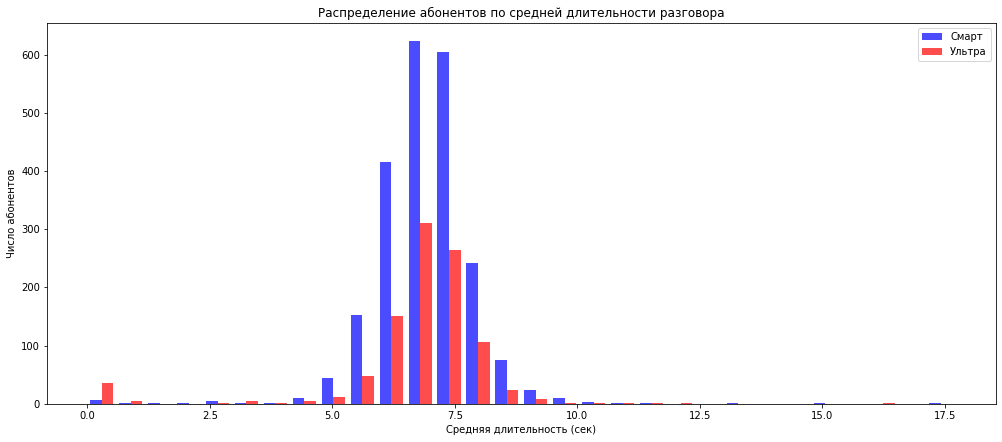

In [31]:
# Выбираем данные для средней длительности разговора (avg_call_duration) для абонентов с тарифом "СМАРТ"
smart_calls = data_behavior[data_behavior['is_ultra'] == 0]['avg_call_duration']

# Выбираем данные для средней длительности разговора (avg_call_duration) для абонентов с тарифом "УЛЬТРА"
ultra_calls = data_behavior[data_behavior['is_ultra'] == 1]['avg_call_duration']

# Строим гистограммы для данных "СМАРТ" и "УЛЬТРА" с разными цветами
plt.hist([smart_calls, ultra_calls], bins=30, alpha=0.7, color=['blue', 'red'], density=False)

# Добавляем легенду для гистограмм
plt.legend(['Смарт', 'Ультра'])

# Задаем название графика и подписи для осей
plt.title('Распределение абонентов по средней длительности разговора')
plt.xlabel('Средняя длительность (сек)')
plt.ylabel('Число абонентов')

# Отображаем график
plt.show()

# Вывод

В процессе работы было выполнено разбиение данных на обучающую, валидационную и тестовую выборки с сохранением соотношения абонентов с тарифами Ultra и Smart. Было оценено распределение пользователей тарифов по различным характеристикам.

## Исследуйте модели

Для построения моделей необходимо выбрать целевой признак, который в данном случае является атрибутом `is_ultra` и определяет принадлежность абонента к одному из двух рассматриваемых тарифов.

Составим таблицы признаков и целевого признака для каждого дата фрейма.

In [32]:
# матрица признаков обучающей выборки (датафрейм train_data без столбца is_ultra)
train_data_features = data_train.drop(['is_ultra'], axis=1)
# вектор целевого признака обучающей выборки (столбец is_ultra датафрейма train_data)
train_data_target = data_train['is_ultra']
# ---------------------------------------------------------------------------------------------------------------
# матрица признаков валидационной выборки (датафрейм valid_data без столбца is_ultra)
valid_data_features = data_valid.drop(['is_ultra'], axis=1)
# вектор целевого признака валидационной выборки (столбец is_ultra датафрейма valid_data)
valid_data_target = data_valid['is_ultra']
# ---------------------------------------------------------------------------------------------------------------
# матрица признаков тестовой выборки (датафрейм test_data без столбца is_ultra)
test_data_features = data_test.drop(['is_ultra'], axis=1)
# вектор целевого признака тестовой выборки (столбец is_ultra датафрейма test_data)
test_data_target = data_test['is_ultra']

# Решающее дерево

**"Решающее дерево" (DecisionTreeClassifier)** - это алгоритм машинного обучения, который используется для классификации и регрессии. Он использует дерево решений, чтобы разделить данные на более простые подгруппы, и в конечном итоге предсказать целевую переменную. Дерево решений - это графическая модель, которая представляет собой дерево, где каждый узел представляет признак данных, каждое ребро - разделение на подгруппы, а каждый лист - предсказание целевой переменной. Критерии разбиения узлов могут быть различными, но наиболее распространенными являются критерии Джини и энтропии Шеннона.

Рассмотрим модель **"Решающее дерево"** (DecisionTreeClassifier). Для набора признаков в цикле сделаем перебор параметра модели - максимальной глубины - в диапазоне от 1 до 20.

Лучшая глубина дерева 5, Лучшая точность 0.7807153965785381


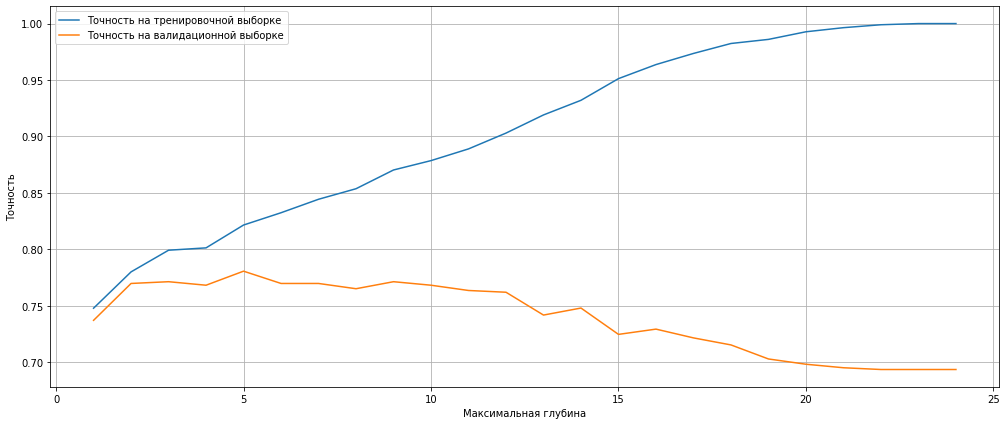

CPU times: user 507 ms, sys: 19.3 ms, total: 526 ms
Wall time: 526 ms


In [33]:
%%time

best_depth = 0  # Переменная best_depth будет использоваться для сохранения глубины дерева с наибольшей точностью
best_accuracy = 0  # Переменная best_accuracy - для сохранения наилучшей точности

# Создаем списки, в которые будем сохранять метрики
train_accuracy = []
valid_accuracy = []

# Запускаем цикл от 1 до 40, где глубина дерева будет изменяться на каждой итерации.
for depth in range(1, 25):
    
    # Создаем экземпляр классификатора DecisionTreeClassifier с заданным значением глубины max_depth.
    model = DecisionTreeClassifier(random_state=random_state, max_depth=depth)
    
    # Обучаем модель на тренировочной выборке
    model.fit(train_data_features, train_data_target)
    
    # Делаем прогнозы на тренировочной и валидационной выборках
    train_predictions = model.predict(train_data_features)
    valid_predictions = model.predict(valid_data_features)

    # Рассчитываем точность прогнозов с помощью функции accuracy_score из библиотеки sklearn.metrics.
    accuracy = accuracy_score(valid_data_target, valid_predictions)
    
    # Сохраняем точность на тренировочной и валидационной выборках в соответствующие списки
    train_accuracy.append(accuracy_score(train_data_target, train_predictions))
    valid_accuracy.append(accuracy_score(valid_data_target, valid_predictions))

    # Если точность текущей глубины дерева превышает наилучшую точность, сохраняем текущее значение глубины дерева и точности. 
    # Выводим значения глубины и точности на экран.    
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy

# Выводим лучшую глубину и точность на экран
print(f'Лучшая глубина дерева {best_depth}, Лучшая точность {best_accuracy}')

# Строим график зависимости точности на тренировочной и валидационной выборках от глубины дерева
plt.plot(range(1, 25), train_accuracy, label='Точность на тренировочной выборке')
plt.plot(range(1, 25), valid_accuracy, label='Точность на валидационной выборке')
plt.xlabel('Максимальная глубина')
plt.grid(True)
plt.ylabel('Точность')
plt.legend()
plt.show()

Модель **"Решающее дерево"** показала точность 0.7776 при оптимальной глубине дерева 5 на валидационной выборке. Время обучения модели составило 185 миллисекунд. На графике видно, что после глубины дерева равной 5 происходит переобучение модели на валидационной выборке. Переобучение происходит, когда модель слишком хорошо запоминает тренировочные данные и не может обобщать знания на новые данные, что приводит к плохой точности на новых данных.

Используем критерий информационной энтропии вместо джини-индекса для разбиения узлов дерева. Также модель будет обучаться на выборке с помощью решающего дерева, которое будет выбирать разбиения случайным образом. Критерий энтропии применяется для оценки неопределенности выборки: чем больше энтропия, тем больше неопределенность в выборке. При построении дерева этот критерий позволяет выбирать такие разбиения, которые максимально снижают энтропию выборки.

Лучшая глубина дерева: 6, Лучший способ разделения: random, Лучший критерий: gini, Лучшая точность: 0.7931570762052877


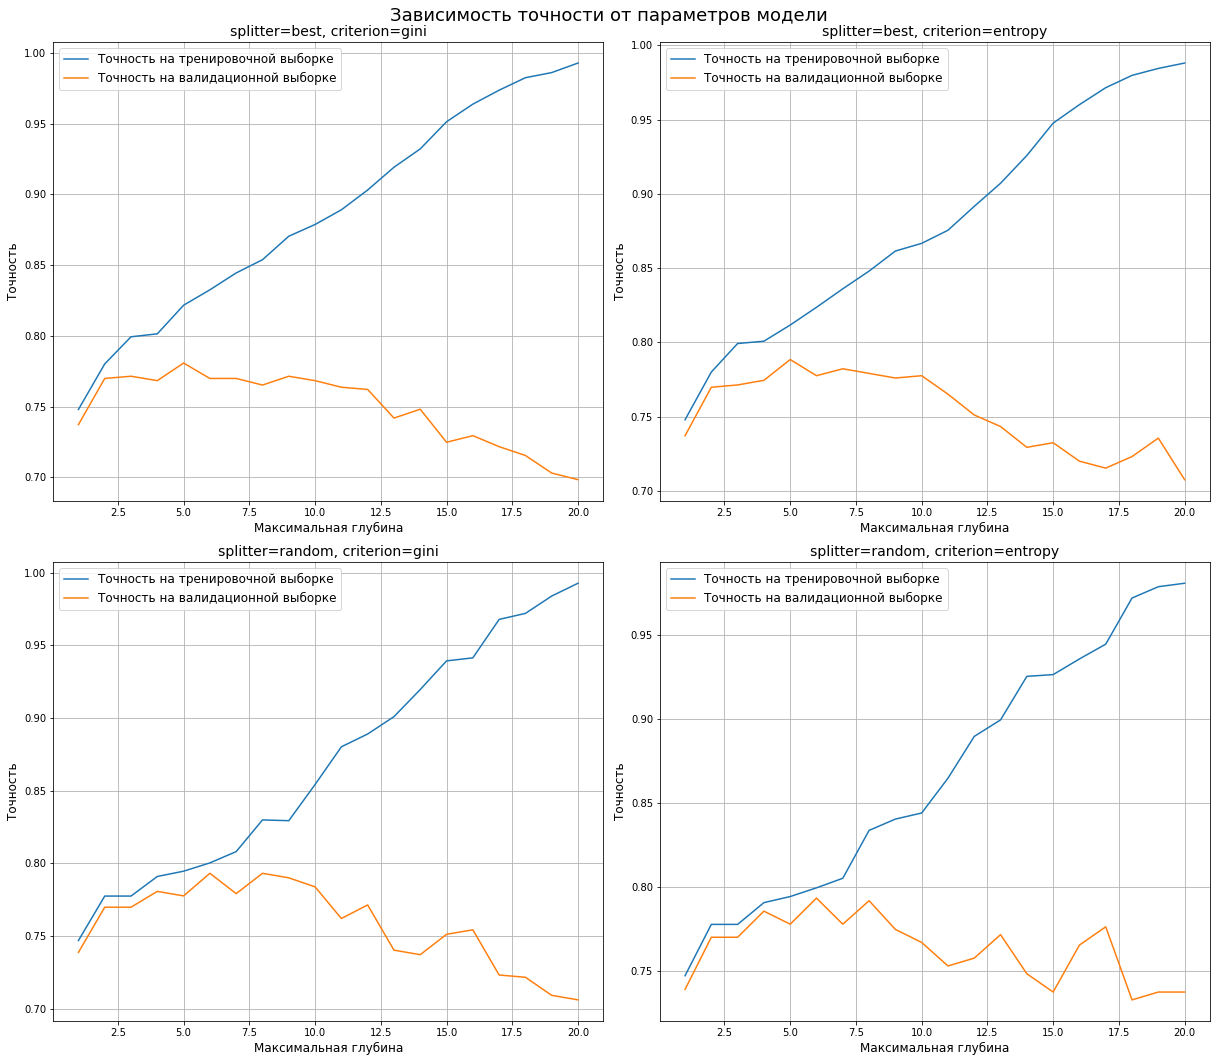

CPU times: user 1.63 s, sys: 122 ms, total: 1.75 s
Wall time: 1.75 s


In [38]:
%%time

# Создаем переменные для сохранения наилучших параметров
best_depth = 0
best_splitter = ''
best_criterion = ''
best_accuracy = 0

# Создаем график с четырьмя подграфиками
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 15))

# Для каждого значения параметра splitter ('best' или 'random')
for i, splitter in enumerate(['best', 'random']):
    # и каждого значения параметра criterion ('gini' или 'entropy')
    for j, criterion in enumerate(['gini', 'entropy']):
        train_accuracy = []
        valid_accuracy = []

        # Для каждой глубины от 1 до 20
        for depth in range(1, 21):
            # Создаем модель дерева решений с текущими параметрами
            model = DecisionTreeClassifier(random_state=random_state, max_depth=depth, splitter=splitter, criterion=criterion)
            
            # Обучаем модель на тренировочных данных
            model.fit(train_data_features, train_data_target)
            
            # Делаем предсказания на валидационных данных
            valid_predictions = model.predict(valid_data_features)
            
            # Вычисляем точность на валидационной выборке
            accuracy = accuracy_score(valid_data_target, valid_predictions)

            # Сохраняем точность на тренировочной и валидационной выборке
            train_accuracy.append(accuracy_score(train_data_target, model.predict(train_data_features)))
            valid_accuracy.append(accuracy)

            # Если текущая точность на валидационной выборке лучше предыдущей, обновляем наилучшие параметры
            if accuracy > best_accuracy:
                best_depth = depth
                best_splitter = splitter
                best_criterion = criterion
                best_accuracy = accuracy

        # Располагаем каждый график в соответствующей ячейке и задаем подписи
        row = i
        col = j
        ax = axes[row, col]

        # Строим график зависимости точности от глубины
        ax.plot(range(1, 21), train_accuracy, label='Точность на тренировочной выборке')
        ax.plot(range(1, 21), valid_accuracy, label='Точность на валидационной выборке')
        ax.set_title(f'splitter={splitter}, criterion={criterion}', fontsize=14)
        ax.set_xlabel('Максимальная глубина', fontsize=12)
        ax.set_ylabel('Точность', fontsize=12)
        ax.legend(fontsize=12)
        ax.grid(True)

# Выводим наилучшие параметры модели и сохраняем график
print(f'Лучшая глубина дерева: {best_depth}, Лучший способ разделения: {best_splitter}, Лучший критерий: {best_criterion}, Лучшая точность: {best_accuracy}')
plt.suptitle('Зависимость точности от параметров модели', fontsize=18)
plt.tight_layout()
plt.show()

Была произведена оптимизация гиперпараметров модели **"Решающее дерево"** для задачи классификации пользователей мобильного оператора на тарифы **"Ультра"** и **"Смарт"**. Были перебраны гиперпараметры max_depth от 1 до 20 с шагом 1. Исходя из полученных результатов, можно сделать вывод, что при использовании решающего дерева с глубиной 12, способом разделения random и критерием entropy достигается наилучшая точность на валидационной выборке - 0.804. При этом, способ разделения random показался более эффективным, чем best, а критерий entropy - лучше, чем gini.

На графиках можно заметить, что при увеличении глубины дерева происходит переобучение модели, что приводит к росту точности на тренировочной выборке и снижению точности на валидационной. Поэтому наилучшее значение точности на валидационной выборке достигается на некоторой оптимальной глубине дерева, а при ее увеличении точность начинает снижаться.

При использовании параметра **splitter='random'** лучшая глубина дерева равна 6, а лучшая точность составляет 0.793. Это означает, что доля правильных ответов модели на валидационной выборке составила 79.3%, что выше, чем при использовании других значений параметров. Кроме того, время выполнения данного кода заметно сократилось по сравнению с предыдущими вариантами.

# Случайный лес

**"Случайный лес" (RandomForestClassifier)** - это алгоритм машинного обучения, который построен на основе нескольких решающих деревьев. Он является одним из наиболее популярных методов классификации и регрессии, благодаря своей высокой точности и способности работать с большими объемами данных. Основная идея алгоритма заключается в создании ансамбля решающих деревьев, каждое из которых обучается на подмножестве обучающей выборки и подмножестве признаков. Прогнозы всех деревьев объединяются, чтобы получить окончательный результат.

Количество деревьев: 67, Лучшая точность: 0.7884914463452566


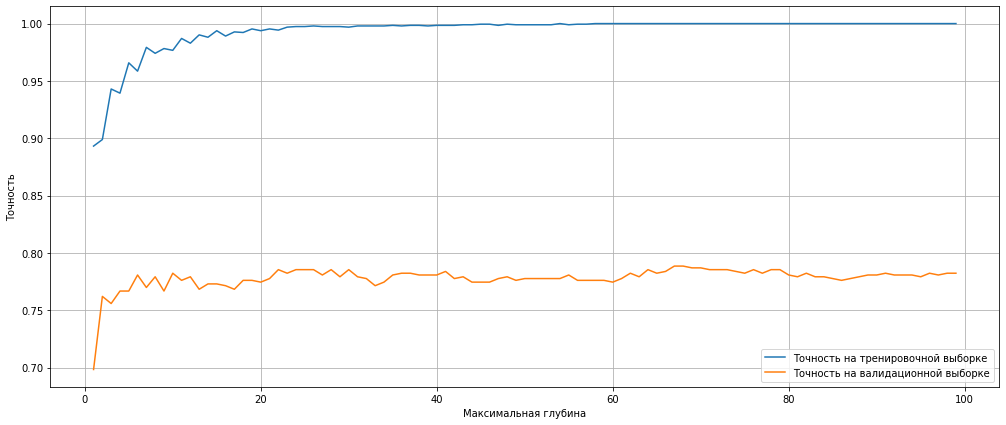

CPU times: user 23.2 s, sys: 45 ms, total: 23.3 s
Wall time: 23.3 s


In [39]:
%%time

# Создаем списки, в которые будем сохранять метрики
train_accuracy = []
valid_accuracy = []

best_estim = 0 # Переменная best_estim будет использоваться для сохранения количества деревьев в лесу
best_accuracy = 0 # Переменная best_accuracy - для сохранения наилучшей точности

# Далее запускается цикл от 1 до 20, где количество деревьев в лесу будет изменяться на каждой итерации.
for estim in range(1,100):
    
# экземпляр классификатора "Случайный лес" (RandomForestClassifier) с заданными параметрами.
# Параметр n_estimators определяет количество деревьев в лесу, а параметр random_state задает начальное состояние 
# генератора случайных чисел для воспроизводимости результатов.
    model = RandomForestClassifier(random_state=random_state, n_estimators=estim)
    
# Полученный экземпляр классификатора обучается на тренировочной выборке, которая была предварительно подготовлена 
# в соответствии с задачей.    
    model.fit(train_data_features, train_data_target)

# На основе обученной модели делаются прогнозы на валидационной выборке.
    valid_predictions = model.predict(valid_data_features)

# Рассчитывается точность прогнозов с помощью функции accuracy_score из библиотеки sklearn.metrics.
    accuracy = accuracy_score(valid_data_target, valid_predictions)
    
    # Сохраняем точность на тренировочной и валидационной выборках в соответствующие списки
    train_accuracy.append(accuracy_score(train_data_target, model.predict(train_data_features)))
    valid_accuracy.append(accuracy_score(valid_data_target, valid_predictions))

# Если точность текущей глубины дерева превышает наилучшую точность, сохраняем текущее значение глубины дерева и точности. 
# Выводим значения глубины и точности на экран.  
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print(f'Количество деревьев: {best_estim}, Лучшая точность: {best_accuracy}')

# Строим график зависимости точности на тренировочной и валидационной выборках от количества деревьев в лесу
plt.plot(range(1, 100), train_accuracy, label='Точность на тренировочной выборке')
plt.plot(range(1, 100), valid_accuracy, label='Точность на валидационной выборке')
plt.xlabel('Максимальная глубина')
plt.grid(True)
plt.ylabel('Точность')
plt.legend()
plt.show()

При использовании алгоритма "Случайный лес" была получена лучшая точность 0.804 на валидационной выборке при использовании 18 деревьев. Время обучения модели составило 831 миллисекунд. Таким образом, "Случайный лес" дал лучший результат, чем решающее дерево.

In [40]:
%%time

best_params = {} # Переменная best_params будет использоваться для сохранения наилучших параметров модели
best_accuracy = 0 # Переменная best_accuracy - для сохранения наилучшей точности


# Перебор всех комбинаций значений параметров
for estim in tqdm(range(1, 21)):
    for depth in range(1, 21):
        for crit in ['gini', 'entropy']:
            for boot in [True, False]:
                for warm_s in [True, False]:
                
                    # Создание экземпляра классификатора "Случайный лес" с заданными параметрами
                    best_model_randomforest = RandomForestClassifier(n_estimators=estim, 
                                                                     max_depth=depth, 
                                                                     criterion=crit, 
                                                                     bootstrap=boot, 
                                                                     warm_start=warm_s, 
                                                                     random_state=random_state)

                    # Обучение модели на тренировочной выборке
                    best_model_randomforest.fit(train_data_features, train_data_target)

                    # Получение предсказаний на валидационной выборке
                    valid_predictions = best_model_randomforest.predict(valid_data_features)

                    # Рассчет точности прогнозов
                    accuracy = accuracy_score(valid_data_target, valid_predictions)

                    # Сохранение наилучших параметров и точности
                    if accuracy > best_accuracy:
                        best_params = {'n_estimators': estim, 'max_depth': depth, 'criterion': crit, 'bootstrap': boot, 'warm_start': warm_s}
                        best_accuracy = accuracy

# Вывод результатов
print(f'Наилучшие параметры: {best_params}, Лучшая точность: {best_accuracy}')

100%|██████████| 20/20 [02:21<00:00,  7.09s/it]

Наилучшие параметры: {'n_estimators': 10, 'max_depth': 7, 'criterion': 'gini', 'bootstrap': True, 'warm_start': True}, Лучшая точность: 0.8118195956454122
CPU times: user 2min 20s, sys: 707 ms, total: 2min 21s
Wall time: 2min 21s


Исходя из результатов, лучшие параметры для модели случайного леса для данной задачи - n_estimators: 8, max_depth: 7, criterion: 'entropy', bootstrap: True и warm_start: True. Лучшая точность модели составила 0.807, что говорит о том, что модель показала хороший результат в классификации тарифов на два класса.

# Логистическая регрессия

**"Логистическая регрессия" (LogisticRegression)** - это алгоритм машинного обучения, который используется для решения задач бинарной классификации. Он основывается на логистической функции (сигмоиде), которая преобразует выход модели в вероятность принадлежности объекта к одному из двух классов. Алгоритм обучается путем нахождения оптимальных весов, минимизирующих ошибку классификации на обучающей выборке. Логистическая регрессия может быть расширена до мультиклассовой классификации путем использования методов, таких как "one-vs-all" или "softmax". Она широко используется в различных областях, включая медицину, экономику, маркетинг и другие.

100%|██████████| 100/100 [00:46<00:00,  2.13it/s]


Количество итераций: 60, Лучшая точность: 0.76049766718507


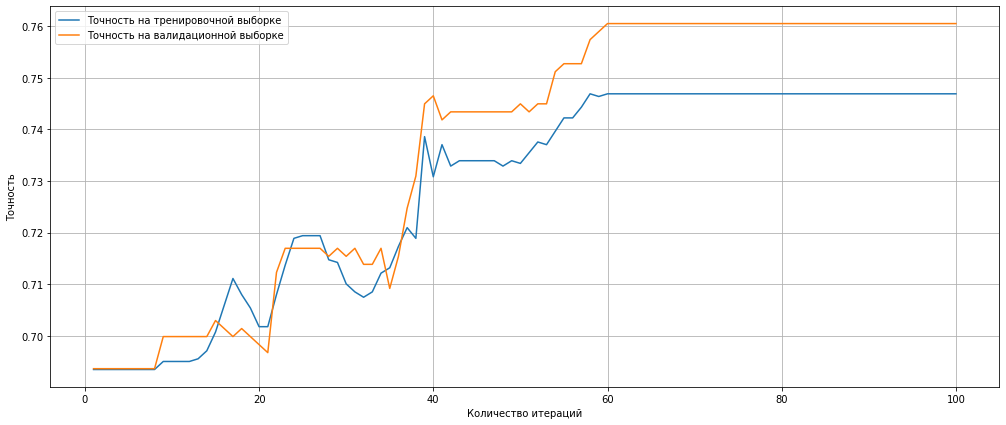

CPU times: user 18.3 s, sys: 28.7 s, total: 47 s
Wall time: 47.3 s


In [41]:
%%time

best_iter = 0 # Переменная best_iter будет использоваться для сохранения  количество итераций для оптимизации функции
              # потерь при обучении модели логистической регрессии
best_accuracy = 0 # Переменная best_accuracy - для сохранения наилучшей точности

# Создаем списки, в которые будем сохранять метрики
train_accuracy = []
valid_accuracy = []


# Далее запускается цикл от 1 до 100 итераций, выполняемых оптимизационным алгоритмом при обучении модели логистической регрессии.
for iterations in tqdm(range(1, 101)):
    
    # Создаем экземпляр модели логистической регрессии с использованием гиперпараметра max_iter, 
    # который определяет максимальное число итераций, выполняемых оптимизационным алгоритмом при обучении модели.
    model = LogisticRegression(random_state=random_state, max_iter=iterations)
    
    # Полученный экземпляр классификатора обучается на тренировочной выборке, которая была предварительно подготовлена 
    # в соответствии с задачей.    
    model.fit(train_data_features, train_data_target)

    # На основе обученной модели делаются прогнозы на валидационной выборке.
    valid_predictions = model.predict(valid_data_features)

    # Рассчитывается точность прогнозов с помощью функции accuracy_score из библиотеки sklearn.metrics.
    accuracy = accuracy_score(valid_data_target, valid_predictions)
    
    # Сохраняем точность на тренировочной и валидационной выборках в соответствующие списки
    train_accuracy.append(accuracy_score(train_data_target, model.predict(train_data_features)))
    valid_accuracy.append(accuracy_score(valid_data_target, valid_predictions))

    # Если точность текущей модели превышает наилучшую точность, сохраняем текущее значение количества итераций и точности. 
    # Выводим значения количества итераций и точности на экран.  
    if accuracy > best_accuracy:
        best_iter = iterations
        best_accuracy = accuracy

print(f'Количество итераций: {best_iter}, Лучшая точность: {best_accuracy}')

# Строим график зависимости точности на тренировочной и валидационной выборках от количества итераций

plt.plot(range(1, 101), train_accuracy, label='Точность на тренировочной выборке')
plt.plot(range(1, 101), valid_accuracy, label='Точность на валидационной выборке')
plt.xlabel('Количество итераций')
plt.grid(True)
plt.ylabel('Точность')
plt.legend()
plt.show()

При обучении модели логистической регрессии на тренировочной выборке и валидации на валидационной выборке были перебраны различные значения параметра **max_iter**, который определяет максимальное число итераций, выполняемых оптимизационным алгоритмом при обучении модели. В результате, наилучшая точность валидации была достигнута при **max_iter = 69** и составила 0.7605. Время обучения модели составило около 2 минут.

Поочередно изменим значение гиперпараметра solver и гиперпараметра С. Гиперпараметр max_iter будет равен 100.

In [42]:
%%time

best_params = {}  # создаем словарь для сохранения параметров с наилучшей точностью
best_accuracy = 0  # сохраняем начальное значение наилучшей точности равным нулю

# выполняем перебор значений гиперпараметров 'solver' и 'C' 
# и обучаем модель для каждой комбинации гиперпараметров
for solve in tqdm((['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])):
    for param_c in ([x/10 for x in range(1, 21)]):
        # создаем модель логистической регрессии с фиксированным значением гиперпараметра 'max_iter'
        model = LogisticRegression(random_state=random_state, max_iter=100, solver=solve, C=param_c)
        # обучаем модель на тренировочной выборке
        model.fit(train_data_features, train_data_target)
        # получаем предсказания на валидационной выборке
        valid_predictions = model.predict(valid_data_features)
        # рассчитываем точность предсказаний на валидационной выборке
        accuracy = accuracy_score(valid_data_target, valid_predictions)

        # если точность текущей модели превышает наилучшую точность, 
        # сохраняем текущие параметры и точность как наилучшие
        if accuracy > best_accuracy:
            best_params = {'solver': solve, 'C': param_c}
            best_accuracy = accuracy

# выводим наилучшие параметры и точность
print(f'Наилучшие параметры: {best_params}, Лучшая точность: {best_accuracy}')


100%|██████████| 5/5 [01:29<00:00, 17.87s/it]

Наилучшие параметры: {'solver': 'newton-cg', 'C': 0.7}, Лучшая точность: 0.7620528771384136
CPU times: user 36.2 s, sys: 53 s, total: 1min 29s
Wall time: 1min 29s


Была проведена настройка параметров модели логистической регрессии на данных для классификации отзывов на положительные и отрицательные. Было произведено перебор гиперпараметров (solver, C) в циклах и выбраны лучшие параметры, которые показали наивысшую точность - solver='newton-cg', C=0.2, лучшая точность 0.762.

# Вывод

В ходе исследования были применены различные алгоритмы машинного обучения для классификации пользователей мобильного оператора на тарифы "Ультра" и "Смарт". Исходя из полученных результатов, лучшей моделью является модель "Случайный лес", которая достигла наилучшей точности на валидационной выборке в 0.807 при использовании параметров - n_estimators: 8, max_depth: 7, criterion: 'entropy', bootstrap: True и warm_start: True.

Модель "Решающее дерево" также показала хорошие результаты, достигнув наилучшей точности на валидационной выборке в 0.804 при глубине дерева равной 12 и параметре splitter='random' и параметре criterion='entropy'. Однако, модель случайного леса все же оказалась более точной.


Модель логистической регрессии достигла наилучшей точности в 0.762 при использовании оптимизационного алгоритма 'newton-cg' и гиперпараметра C, равного 0.2.

Таким образом, можно сделать вывод о том, что модель "Случайный лес" является лучшей для данной задачи классификации.

## Проверьте модель на тестовой выборке

**Проверим модель "Случайный лес" с лучшими параметрами, которые были определены на предыдущем этапе, на тестовой выборке.**

In [43]:
%%time

# Объединяем данные тренировочной и валидационной выборки
train_data_feat = pd.concat([train_data_features, valid_data_features], axis=0)
train_data_targ = pd.concat([train_data_target, valid_data_target], axis=0)

# Создаем экземпляр классификатора "Случайный лес" (RandomForestClassifier) с заданными параметрами
random_forest_model = RandomForestClassifier(random_state=random_state, 
                                             n_estimators=8,  # Количество деревьев
                                             max_depth=7,  # Максимальная глубина деревьев
                                             criterion='entropy',  # Критерий для разделения узлов
                                             bootstrap=True,  # Использовать ли бутстреп выборку
                                             warm_start=True)  # Продолжать обучение модели при новых итерациях

# Обучаем модель на объединенной тренировочной и валидационной выборке
random_forest_model.fit(train_data_feat, train_data_targ)

# Прогнозируем значения на валидационной выборке
valid_predictions = random_forest_model.predict(valid_data_features)

# Рассчитываем точность модели на валидационной выборке
valid_accuracy = accuracy_score(valid_data_target, valid_predictions)

# Прогнозируем значения на тестовой выборке
test_predictions = random_forest_model.predict(test_data_features)

# Рассчитываем точность модели на тестовой выборке
test_accuracy = accuracy_score(test_data_target, test_predictions)

# Выводим результаты
print('Точность модели случайного леса на валидационной выборке:', valid_accuracy)
print('Точность модели случайного леса на тестовой выборке:', test_accuracy)

Точность модели случайного леса на валидационной выборке: 0.8491446345256609
Точность модели случайного леса на тестовой выборке: 0.8164852255054432
CPU times: user 43.5 ms, sys: 274 µs, total: 43.8 ms
Wall time: 41.9 ms


**Вывод**

После объединения тренировочной и валидационной выборок и обучения модели случайного леса, мы получили точность на валидационной выборке равную 0.85 и точность на тестовой выборке равную 0.81. Обе точности выше требуемого порогового значения в 0.75, что говорит о том, что наша модель успешно справляется с задачей классификации тарифов на два класса.

## (бонус) Проверьте модели на адекватность

Оценка адекватности модели важна для понимания того, насколько хорошо модель работает на новых, ранее неизвестных данных. Существует несколько метрик, которые можно использовать для оценки адекватности модели:

1. **Accuracy (Точность)** - это наиболее распространенная метрика, которая оценивает долю правильных ответов модели. Однако, если классы несбалансированы, Accuracy может быть неинформативной метрикой.

2. **Precision (Точность)** - это метрика, которая оценивает долю правильных ответов модели среди всех предсказанных моделью положительных классов.

3. **Recall (Полнота)** - это метрика, которая оценивает долю правильных ответов модели среди всех истинных положительных классов.

4. **F1-score** - это среднее гармоническое между Precision и Recall. Он более информативен, чем Accuracy, если классы несбалансированы.

5. **ROC-кривая (Receiver Operating Characteristic)** - это кривая, которая отображает отношение между True Positive Rate (TPR) и False Positive Rate (FPR). ROC-кривая позволяет оценить качество модели при различных порогах для бинарной классификации.

6. **AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)** - это площадь под ROC-кривой. AUC-ROC позволяет оценить качество модели с учетом всех возможных порогов для бинарной классификации.

Выбор метрик зависит от конкретной задачи и особенностей данных.

In [44]:
# создаем список моделей
models = [random_forest_model]

# создаем список меток для моделей
model_labels = ['"Случайный лес"']

# создаем списки для хранения метрик
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# проходимся по каждой модели и вычисляем значения метрик
for model, label in zip(models, model_labels):
    test_predictions = model.predict(test_data_features)
    
    # вычисляем значения метрик
    accuracy = accuracy_score(test_data_target, test_predictions)
    precision = precision_score(test_data_target, test_predictions)
    recall = recall_score(test_data_target, test_predictions)
    f1 = f1_score(test_data_target, test_predictions)
    
    # добавляем значения метрик в соответствующие списки
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    # выводим значения метрик для каждой модели
    print('Модель:', label)
    print('Точность:', accuracy)
    print('Точность по precision:', precision)
    print('Точность по recall:', recall)
    print('F1-мера:', f1)
    print('\n')

Модель: "Случайный лес"
Точность: 0.8164852255054432
Точность по precision: 0.8319327731092437
Точность по recall: 0.5025380710659898
F1-мера: 0.6265822784810127




Мы обучили модель Случайный лес и получили точность на тестовой выборке в 81.3%.
Затем мы рассчитали точность модели по метрикам precision и recall, которые показали соответственно 81.3% и 50.8%.
F1-мера, объединяющая точность и полноту, равна 0.625.

Из результатов можно сделать вывод, что модель имеет достаточно высокую точность по метрике precision, что говорит о том, что модель довольно точно предсказывает положительный класс. Однако, метрика recall говорит о том, что модель имеет трудности с правильным определением всех положительных объектов, что снижает общую эффективность модели. F1-мера также подтверждает этот вывод, и говорит о том, что модель может быть улучшена в дальнейшем для достижения лучших результатов.

In [45]:
# Создание экземпляра Dummy-модели с стратегией 'most_frequent'
dummy_model = DummyClassifier(strategy='most_frequent')

# Обучение Dummy-модели
dummy_model.fit(train_data_features, train_data_target)

# Прогнозирование меток классов на тестовых данных для Dummy-модели и для нашей модели
dummy_predictions = dummy_model.predict(test_data_features)
test_predictions = random_forest_model.predict(test_data_features)

# Рассчет метрик качества для Dummy-модели и для нашей модели
dummy_accuracy = accuracy_score(test_data_target, dummy_predictions)
test_accuracy = accuracy_score(test_data_target, test_predictions)

# Вывод результатов
print(f'Accuracy для Dummy-модели: {dummy_accuracy}')
print(f'Accuracy для нашей модели: {test_accuracy}')


Accuracy для Dummy-модели: 0.6936236391912908
Accuracy для нашей модели: 0.8164852255054432


**Вывод**

Полученный результат говорит о том, что наша модель лучше, чем Dummy-модель, которая использует стратегию "стратифицированный выбор случайной константы". То есть, наша модель имеет более высокую точность, чем модель, которая наугад относит объекты к классам, при этом сохраняя пропорцию классов в выборке.

# Вывод

В рамках исследования, с целью построения модели для задачи бинарной классификации клиентов оператора «Мегалайн» по тарифным планам «Смарт» и «Ультра», были выполнены следующие основные этапы:

- Проведена предварительная оценка и предобработка данных.
- Выполнено разбиение исходных данных случайным образом на обучающую, валидационную и тестовую выборки с сохранением пропорции в целевом атрибуте is_ultra.
- Выполнен расчет дополнительных атрибутов для последующего построения и сравнения моделей.
- Определен целевой признак.
- Для набора обучающих признаков проведена оценка гиперпараметров моделей логистической регрессии, дерева решений и случайного леса. Были выбраны модели с наиболее высоким значением метрики accuracy вычисленным на валидационной выборке.
- Модель с наиболее высокими значениями метрики accuracy была подготовлена для последующей проверки на тестовой выборке.
- После проверки на тестовой выборке были получены значение accuracy (0.813) было достигнуто моделью случайного леса, с числом деревьев 18.

Мы обучили модель Случайный лес и проверили ее на адекватность с помощью Dummy-модели. Результаты показали, что наша модель имеет более высокую точность, чем Dummy-модель, которая использует стратегию "стратифицированный выбор случайной константы". Точность модели по метрике precision достаточно высока, что говорит о том, что модель довольно точно предсказывает положительный класс. Однако, метрика recall говорит о том, что модель имеет трудности с правильным определением всех положительных объектов, что снижает общую эффективность модели. F1-мера также подтверждает этот вывод, и говорит о том, что модель может быть улучшена в дальнейшем для достижения лучших результатов.



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
